In [27]:
import pyclesperanto_prototype as cle
import numpy as np
from skimage.io import imread, imshow
cle.select_device('TX')  # TODO: change to your GPU

<NVIDIA GeForce RTX 2080 SUPER on Platform: NVIDIA CUDA (2 refs)>

# GPU arrays and Memory management

pyClesperanto is a processing library, this means that it will apply operations on data (e.g. images) which, for python, are commonly stored using the numpy library. However, numpy arrays are stored for CPU processing, they are not accessible by the GPU. If we want to apply GPU-accelerate operation on arrays, we need to send the data into the GPUs memory.

For this, the library provides an array class called `OCLArray` which offer a similar interface as numpy arrays and allows to hold data in the GPU memory.


We will base the data manipulation on three operations:
- `create` a memory space on the device
- `push` data into the device
- `pull` the data from the device

### Create 

We `create` a memory space on the device. The create array is empty by default (all value to 0).  
The only mandatory argument is its shape, following the coordinate standard (z,y,x). 

It is also possible to pass a `dtype` argument to specify the data type to be stored. By default, `float32` is used.

Note: float64 type are not compatible for hardware reasons.

In [19]:
new_gpu_array = cle.create((24,24))
print(type(new_gpu_array), new_gpu_array.shape, new_gpu_array.dtype)
print(new_gpu_array)

<class 'pyclesperanto_prototype._tier0._pycl.OCLArray'> (254, 256) float32
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Here, `new_gpu_array` is a class holding information and pointer to the GPU memory. It is not a numpy array although it behave very similarly.

### Push 

If we already have a data array, an image for example, then we simply have to `push` it on the device. 
This is in fact two operation, a `create` space memory, and a `copy` the memory into the created space on the device.  

Let's load some data (some blobs for example) and store into a numpy array

<class 'numpy.ndarray'> (254, 256) uint8


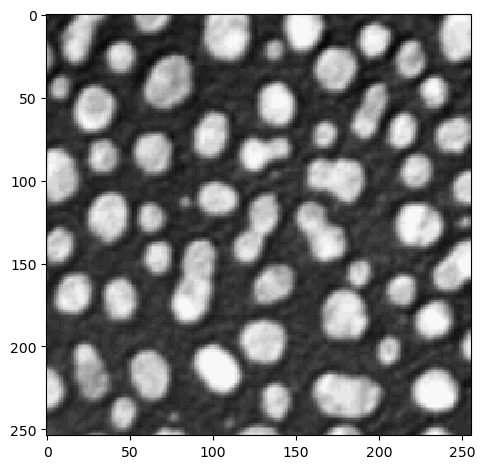

In [29]:
array = np.ones((24,24))
print(type(array), array.shape, array.dtype)

We can now push it to the device using the `push` method. Here we will use the same `dtype` and `shape` provided by the numpy array to define the array on the device.

In [24]:
gpu_array = cle.push(array)
print(type(gpu_array), gpu_array.shape, gpu_array.dtype)

<class 'pyclesperanto_prototype._tier0._pycl.OCLArray'> (254, 256) float32


We have now pushed the array image to the GPU memory. Ready to be used in the librairy. 

Note: is you have a NVIDIA GPU, you can use the system command `nvidia-smi` to see the memory usage of your GPU.

### Pull 

`pull` is the exact inverse of the `push`. Here  we want to read back the memory located on the device.

Similarly to the `push` that read the information from the numpy metadata, we do the same for the pull. We read the metadata of our gpu data array and create a corresponding numpy array, and store the data in it.

In [25]:
read_array = cle.pull(gpu_array)
print(type(read_array), read_array.shape, read_array.dtype)

<class 'numpy.ndarray'> (254, 256) float32


Here we just pull the array we pushed earlier. They should be the same as we did not do any processing on it.

In [12]:
assert(np.array_equal(array, read_array))

Data located on the GPU memory are not readable by classical Python functions or numpy. We always need to `pull` them back from the GPU and then we can read them.

## Exercise : push and pull images

Let's load our favorite image into memory

<class 'numpy.ndarray'> (254, 256) uint8


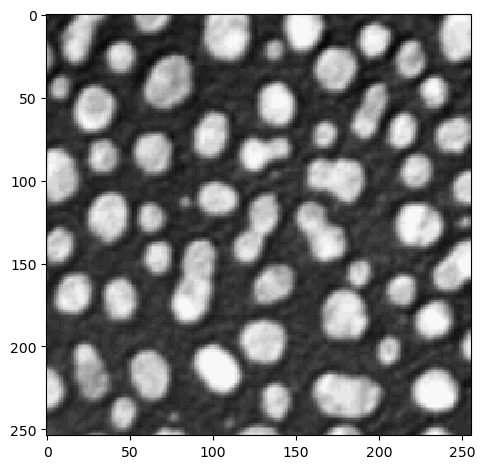

In [31]:
array = imread("../../data/blobs.tif")
print(type(array), array.shape, array.dtype)
_ = imshow(array)

Using `push` and `pull`, move the image into the GPU memory and read it back. What can you observe? Is the data copied back is identical?

/home/stephane/Libraries/miniconda3/envs/proto/lib/python3.11/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


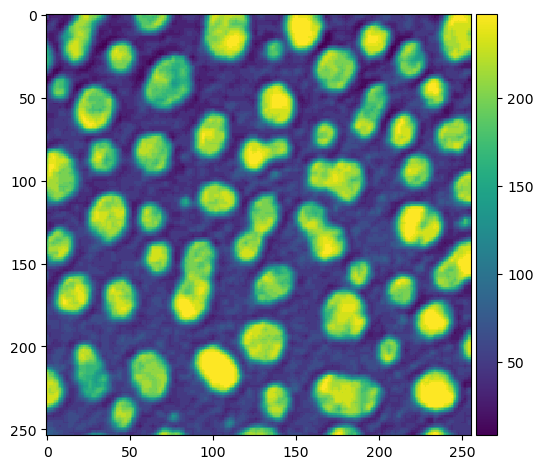

In [34]:
#TODO